In [24]:
import pandas as pd
import numpy as np

from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

plt.style.use('seaborn')
pd.set_option('display.width', 200)
pd.set_option('display.max_colwidth', 20)
pd.set_option('display.max_rows', 100)

In [25]:
#Install all dependencies needed by running the code below.
%run ./system_check.ipynb

Requirement already up-to-date: imbalanced-learn in /home/jupyter-aloukrezis/.local/lib/python3.6/site-packages (0.6.2)


In [26]:
df = pd.read_csv('data/online_shoppers_intention.csv')
df.head().T


,0,1,2,3,4
Administrative,0,0,0,0,0
Administrative_Duration,0,0,0,0,0
Informational,0,0,0,0,0
Informational_Duration,0,0,0,0,0
ProductRelated,1,2,1,2,10
ProductRelated_Duration,0,64,0,2.66667,627.5
BounceRates,0.2,0,0.2,0.05,0.02
ExitRates,0.2,0.1,0.2,0.14,0.05
PageValues,0,0,0,0,0
SpecialDay,0,0,0,0,0


In [27]:
# source: https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe
# a function that provides a summary of the  missing values in a dataset

def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(df)

Your selected dataframe has 18 columns and 12330 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type


In [28]:
df.describe().round(5).T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.31517,3.32178,0.0,0.00000,1.00000,4.00000,27.00000
Administrative_Duration,12330.0,80.81861,176.77911,0.0,0.00000,7.50000,93.25625,3398.75000
Informational,12330.0,0.50357,1.27016,0.0,0.00000,0.00000,0.00000,24.00000
Informational_Duration,12330.0,34.47240,140.74929,0.0,0.00000,0.00000,0.00000,2549.37500
ProductRelated,12330.0,31.73147,44.47550,0.0,7.00000,18.00000,38.00000,705.00000
ProductRelated_Duration,12330.0,1194.74622,1913.66929,0.0,184.13750,598.93690,1464.15721,63973.52223
BounceRates,12330.0,0.02219,0.04849,0.0,0.00000,0.00311,0.01681,0.20000
ExitRates,12330.0,0.04307,0.04860,0.0,0.01429,0.02516,0.05000,0.20000
PageValues,12330.0,5.88926,18.56844,0.0,0.00000,0.00000,0.00000,361.76374
SpecialDay,12330.0,0.06143,0.19892,0.0,0.00000,0.00000,0.00000,1.00000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [30]:
df["average_informational_duration"] = df['Informational_Duration']/df['Informational']
df["average_administrative_duration"] = df['Administrative_Duration']/df['Administrative']
df["average_ProductRelated_duration"] = df['ProductRelated_Duration']/df['ProductRelated']
df["average_BounceRates/ExitRates"] = (df["BounceRates"]+df["ExitRates"])/2
df.isna().sum()
df = df.fillna(0)
df#.isna().sum()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,average_informational_duration,average_administrative_duration,average_ProductRelated_duration,average_BounceRates/ExitRates
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,1,1,1,Returning_Visitor,False,False,0.0,0.000000,0.000000,0.200000
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,2,1,2,Returning_Visitor,False,False,0.0,0.000000,32.000000,0.050000
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,1,9,3,Returning_Visitor,False,False,0.0,0.000000,0.000000,0.200000
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,2,2,4,Returning_Visitor,False,False,0.0,0.000000,1.333333,0.095000
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,3,1,4,Returning_Visitor,True,False,0.0,0.000000,62.750000,0.035000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,6,1,1,Returning_Visitor,True,False,0.0,48.333333,33.656447,0.018087
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,2,1,8,Returning_Visitor,True,False,0.0,0.000000,93.150000,0.010667
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,2,1,13,Returning_Visitor,True,False,0.0,0.000000,30.708333,0.085000
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,2,3,11,Returning_Visitor,False,False,0.0,18.750000,23.066667,0.010526


In [31]:


months = {'JAN':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5,
     'June':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10,
     'Nov':11, 'Dec':12}

df['months'] = df.Month.map(months)
df['months'].value_counts()
seasons = ((df['months'] % 12 + 3) // 3).map({1:'winter', 2: 'Spring', 3:'summer', 4:'Fall'})
df["season"]= seasons
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType,VisitorType,Weekend,Revenue,average_informational_duration,average_administrative_duration,average_ProductRelated_duration,average_BounceRates/ExitRates,months,season
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,1,Returning_Visitor,False,False,0.0,0.000000,0.000000,0.200000,2,winter
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,2,Returning_Visitor,False,False,0.0,0.000000,32.000000,0.050000,2,winter
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,3,Returning_Visitor,False,False,0.0,0.000000,0.000000,0.200000,2,winter
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,4,Returning_Visitor,False,False,0.0,0.000000,1.333333,0.095000,2,winter
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,4,Returning_Visitor,True,False,0.0,0.000000,62.750000,0.035000,2,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,1,Returning_Visitor,True,False,0.0,48.333333,33.656447,0.018087,12,winter
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,8,Returning_Visitor,True,False,0.0,0.000000,93.150000,0.010667,11,Fall
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,13,Returning_Visitor,True,False,0.0,0.000000,30.708333,0.085000,11,Fall
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,11,Returning_Visitor,False,False,0.0,18.750000,23.066667,0.010526,11,Fall


In [32]:



dummy = [
 
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
'VisitorType' ,
    'season'
 ]

for i  in dummy:
    df[i+'_dummies'] =df[i]
#list(df.columns)
dummies_cols = [
 'OperatingSystems_dummies',
 'Browser_dummies',
 'Region_dummies',
 'TrafficType_dummies',
 'VisitorType_dummies',
 'season_dummies'
]
df= pd.get_dummies(df, prefix=None, prefix_sep='_', dummy_na=False, columns=dummies_cols,sparse=False, drop_first=False, dtype=None)
df['Weekend_binary'] = df['Weekend'].map({True:1,False:0})
df['Revenue_Y'] = df['Revenue'].map({True:1,False:0})



list of correlation pair (Max on top):
BounceRates     ExitRates                  0.913004
ProductRelated  ProductRelated_Duration    0.860927
Informational   Informational_Duration     0.618955
Administrative  Administrative_Duration    0.601583
dtype: float64
--------------------------


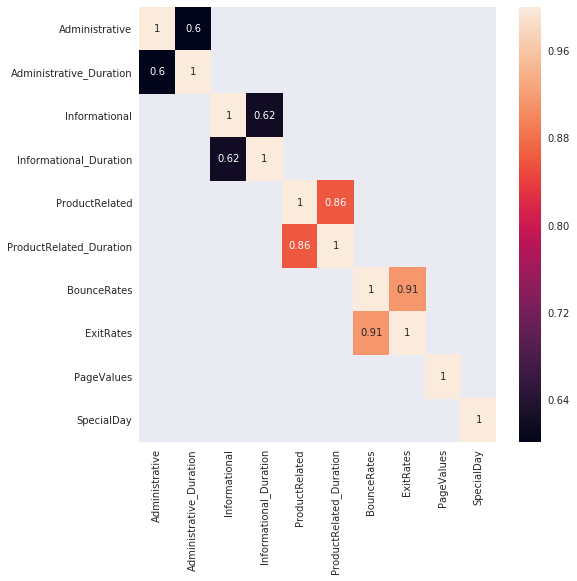

In [33]:
corr_cols =['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
           
 ]


# https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
#correlation matrix
corr_matrix = df[corr_cols].corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
corr_list = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
## prints a descending list of correlation pair (Max on top)
print('list of correlation pair (Max on top):')
print(corr_list[corr_list>= .5])
print("--------------------------")


corr_df =df[corr_cols].corr().abs()
corr_df = corr_df[corr_df >= .5]           
plt.figure(figsize= (8,8))
corr = corr_df#.round(4)
sns.heatmap(corr, annot=True)
plt.show()

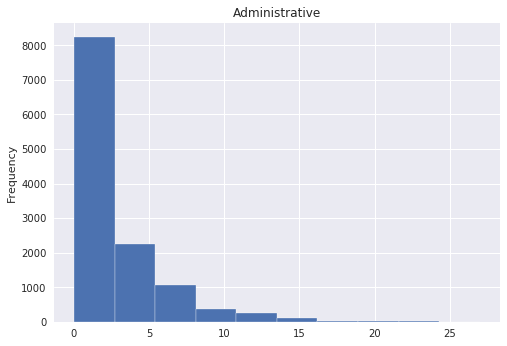

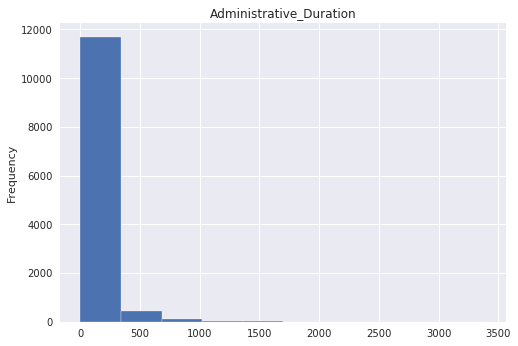

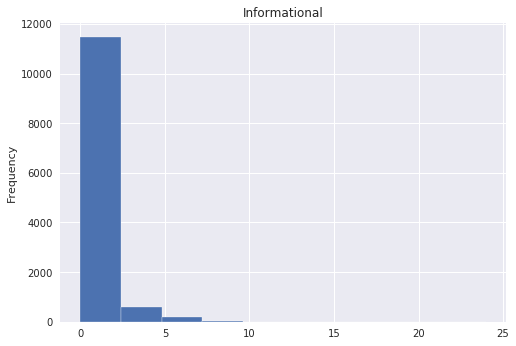

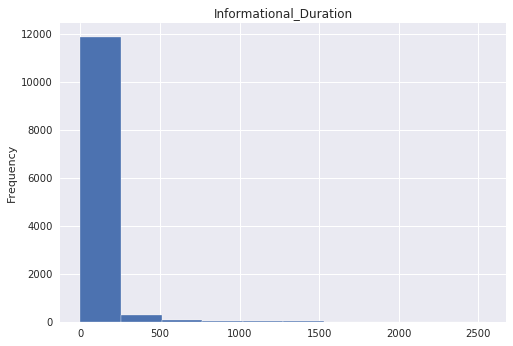

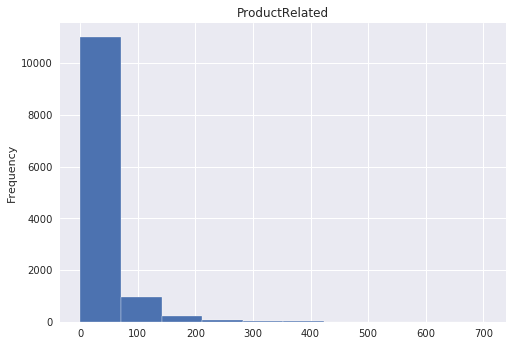

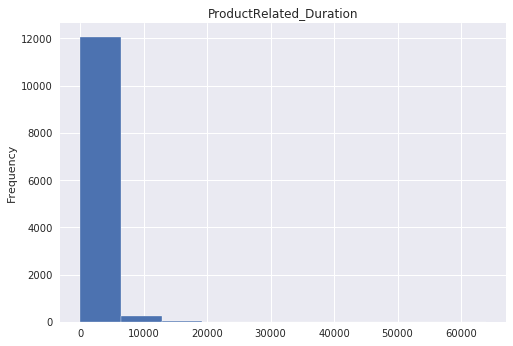

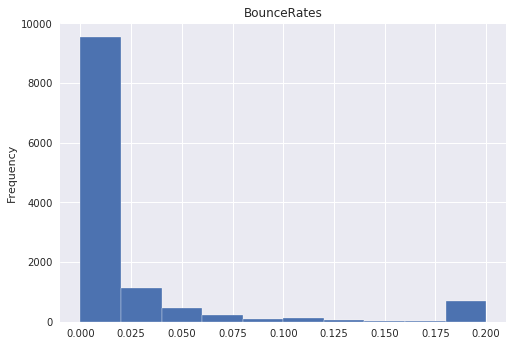

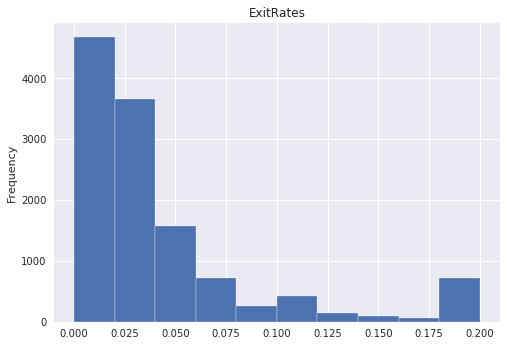

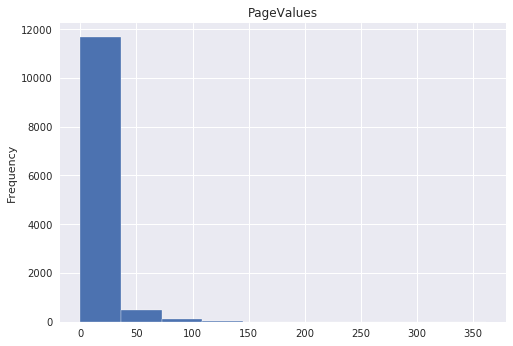

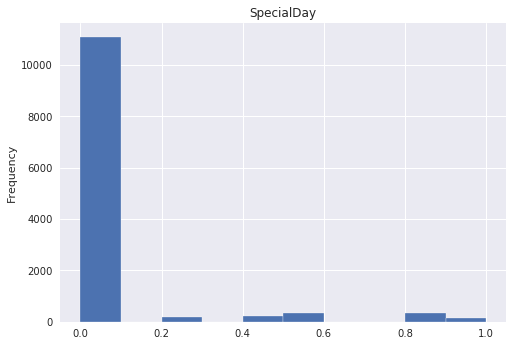

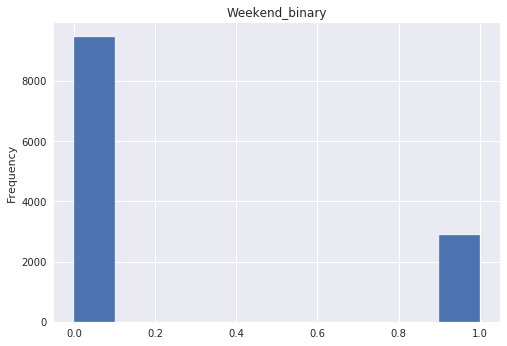

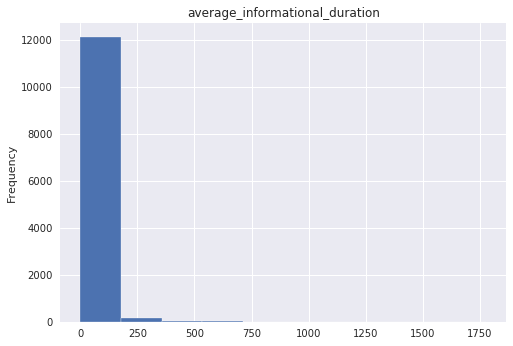

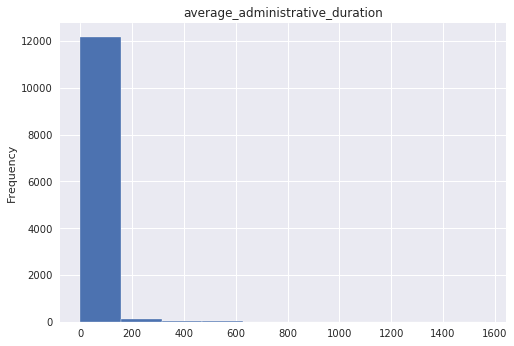

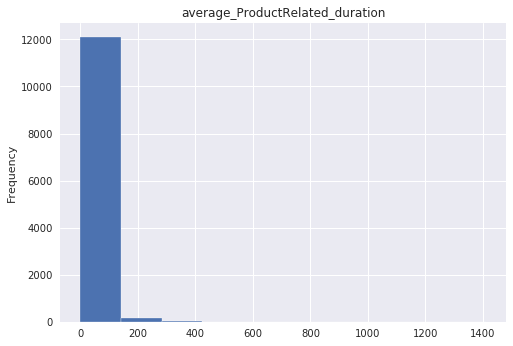

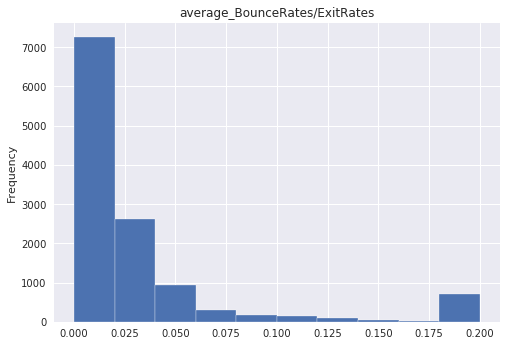

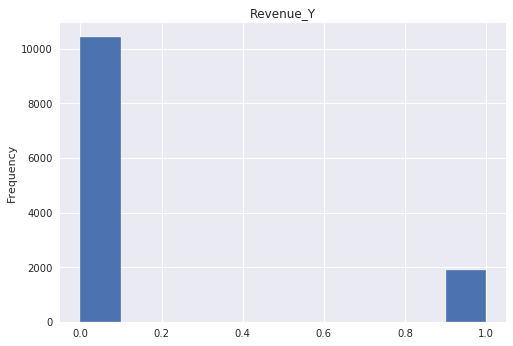

In [34]:
cols =['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'Weekend_binary',   'average_informational_duration', 
                'average_administrative_duration',
       'average_ProductRelated_duration', 'average_BounceRates/ExitRates' ,
 'Revenue_Y']
#df[cols].hist( figsize = (35,20))

#fig, ax = plt.subplots(len(cols), figsize=(40,40))

#fig, ax = plt.subplots(len(cols), figsize=(10, 5))
for col_val in cols:
    
    df[col_val].plot(kind = 'hist' , title = col_val )
    #ax1.set(xlabel='Original ' + col_val)
    
    #df[col_val].hist(    color='#86bf91')

    plt.show()

    

## Applying Standardization & Normalization

#### Method of handling skewness and outliers that exist within the data

### Normalization

We first use Skew_Autotransfom to apply normalization to the data.


 ------------------------------------------------------

 'Administrative_skew' had 'positive' skewness of 1.96

 Transformation yielded skewness of -0.01


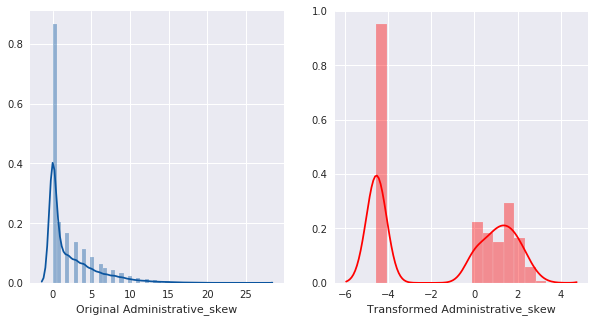


 ------------------------------------------------------

 'Administrative_Duration_skew' had 'positive' skewness of 5.62

 Transformation yielded skewness of 0.01


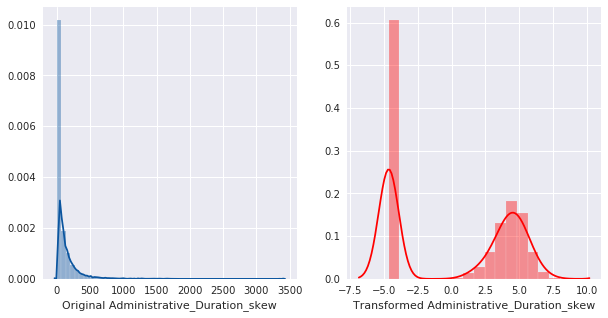


 ------------------------------------------------------

 'Informational_skew' had 'positive' skewness of 4.04

 Transformation yielded skewness of 1.40


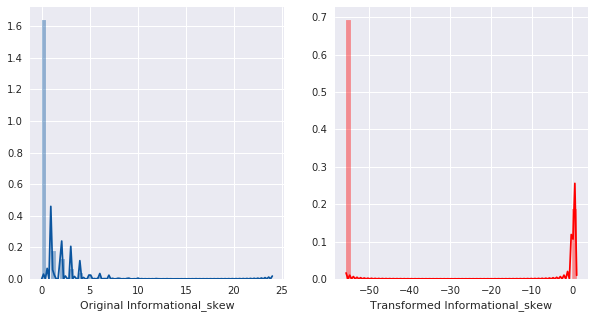


 ------------------------------------------------------

 'ProductRelated_skew' had 'positive' skewness of 4.34

 Transformation yielded skewness of 0.02


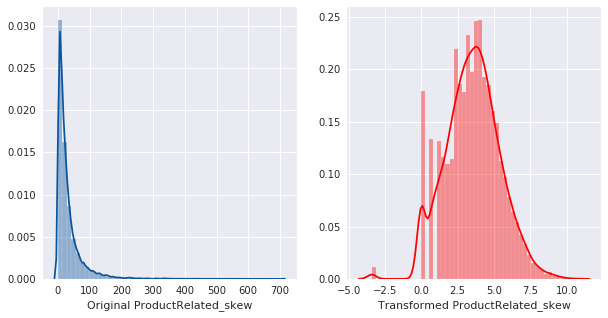


 ------------------------------------------------------

 'BounceRates_skew' had 'positive' skewness of 2.95

 Transformation yielded skewness of 0.47


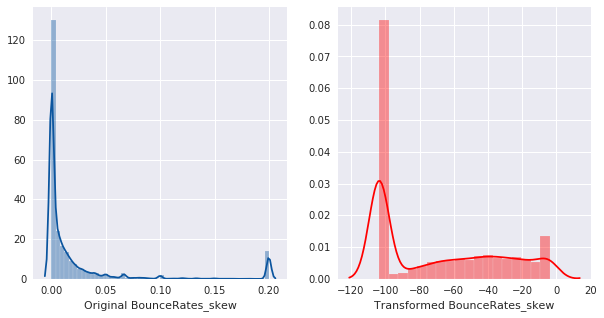


 ------------------------------------------------------

 'PageValues_skew' had 'positive' skewness of 6.38

 Transformation yielded skewness of 1.34


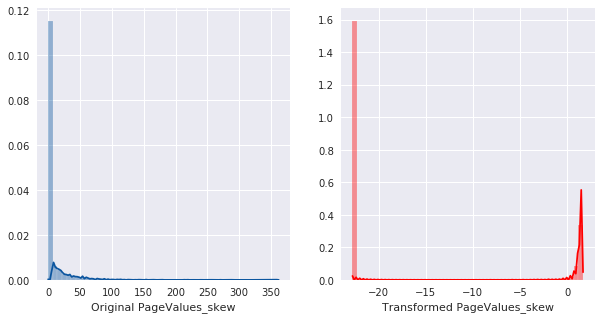


 ------------------------------------------------------

 'ExitRates_skew' had 'positive' skewness of 2.15

 Transformation yielded skewness of 0.04


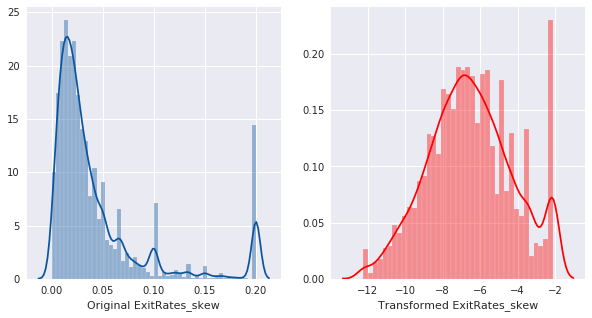


 ------------------------------------------------------

 'Informational_Duration_skew' had 'positive' skewness of 7.58

 Transformation yielded skewness of 1.54


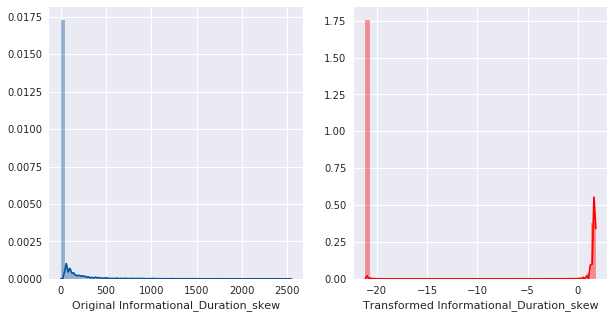


 ------------------------------------------------------

 'average_informational_duration_skew' had 'positive' skewness of 11.22

 Transformation yielded skewness of 1.54


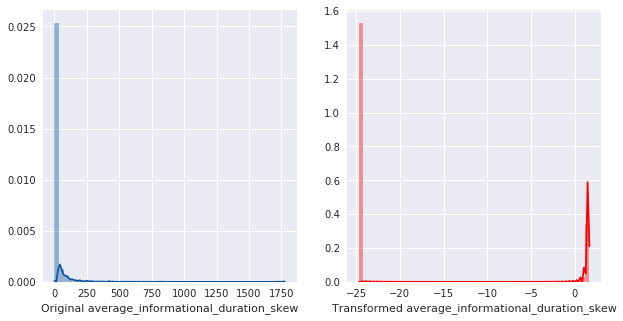


 ------------------------------------------------------

 'average_administrative_duration_skew' had 'positive' skewness of 9.42

 Transformation yielded skewness of -0.00


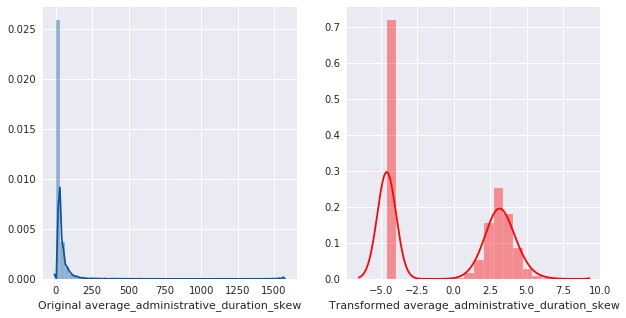


 ------------------------------------------------------

 'average_ProductRelated_duration_skew' had 'positive' skewness of 10.30

 Transformation yielded skewness of 0.21


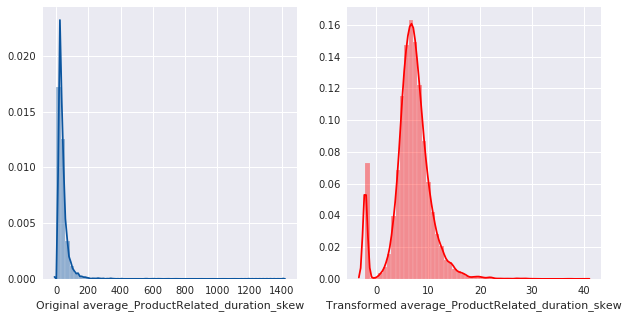


 ------------------------------------------------------

 'average_BounceRates/ExitRates_skew' had 'positive' skewness of 2.66

 Transformation yielded skewness of 0.11


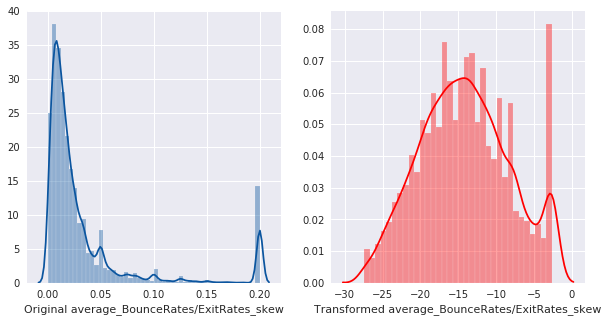

In [35]:
from skew_autotransform import skew_autotransform
skew_cols = ['Administrative',
             'Administrative_Duration',
 
 'Informational',

 'ProductRelated',

 'BounceRates',
 
 'PageValues',
 'ExitRates',
   'Informational_Duration'  , 'average_informational_duration', 'average_administrative_duration',
       'average_ProductRelated_duration',        'average_BounceRates/ExitRates'
            ]

 
for i  in skew_cols:

    df[i+'_skew'] = df[i]
    
    
cols_to_skew = ['Administrative_skew',
                'Administrative_Duration_skew',
 
 'Informational_skew',

 'ProductRelated_skew',

 'BounceRates_skew',
 
 'PageValues_skew' ,
 'ExitRates_skew',
  'Informational_Duration_skew' ,
                
                'average_informational_duration_skew', 
                'average_administrative_duration_skew',
       'average_ProductRelated_duration_skew',
                'average_BounceRates/ExitRates_skew'
               
               
               
               ]

df = skew_autotransform(df,include = cols_to_skew, plot = True, exp = False, threshold = 0.01)


**As can be seen in the above visualizations, there was a tendency for a right skewness in most features prior to normalization.**

### Determining How to Handle Outliers

Before determing what to do with outliers, we decided to look at a few scatter plots of data to get an idea of the data in relation to PageValues, the driving force leading to Revenue. The scatter plots are colored based on if the data point resulted in revenue or not. These two visualizations are two we selected for the purpose of showing two examples, if you would like to referance any more you can look at the Visualization.ipynb file to see more.

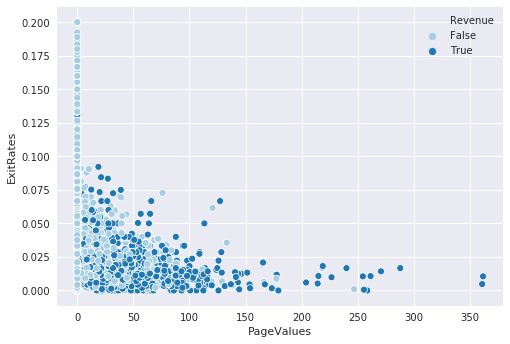

In [36]:
sns.scatterplot(x='PageValues', y='ExitRates', hue = 'Revenue', data=df) 

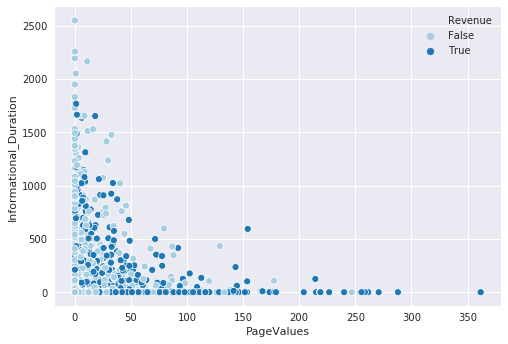

In [37]:
sns.scatterplot(x='PageValues', y='Informational_Duration',hue = 'Revenue', data=df)

When looking at the two example visualziations above, it can be seen that it is the outliers that are causing the skewness in the data. 

You can see specifically wih ExitRates in the first visualization, no Revenue accrue with 0 value for PageValue. Because of this, esentially we know that there is a large amount of people that come onto the site, and choose to leave right away. Within the distribution of the data, it will create a skewnewss, however it essentially impacts the results the same way.

In the second visualization, for 0 value PageValues there are no instances of Informational Duration. There are some instances of what apears to be in the low single digits of a higher Information Duration, but for the most part this seems to be the same as the first visualization. Within the distribution of the data, it will create a skewnewss, however it essentially impacts the results the same way.

Rather than dropping these datapoints, we have determined to keep them in the data set to be used in our models because they directly effect the shape of the distribution which is relevant to how we standardize and normalize it.

### Identifying Features With Outliers

We then applied a test of which features had data points that existed outside of the bounds of the interquartile ranges.

In [38]:
def find_outliers(x):
    
    if x > upper_bound: 
        x = q3
    elif x < lower_bound: 
        x = q1
    else:
        pass
        
    return x

outliers_col =[ 'Informational_Duration_skew'  ,'PageValues_skew' ]

for i  in outliers_col:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)

    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr)
    df[i+'_outliner_fix'] = df[i]#.apply(lambda x: find_outliers(x))

df['PageValues_skew_outliner_fix'] = df['PageValues_skew']

In [39]:
cols_skew = ['Administrative_skew','Administrative_Duration_skew',
'ProductRelated_skew','BounceRates_skew' ,'ExitRates_skew',
'PageValues_skew_outliner_fix'   ,'Informational_Duration_skew_outliner_fix'  ,   'average_informational_duration_skew', 
                'average_administrative_duration_skew',
       'average_ProductRelated_duration_skew',  'average_BounceRates/ExitRates_skew']
df[cols_skew].skew()

Administrative_skew                        -0.011957
Administrative_Duration_skew                0.013104
ProductRelated_skew                         0.019727
BounceRates_skew                            0.474818
ExitRates_skew                              0.043109
PageValues_skew_outliner_fix                1.344268
Informational_Duration_skew_outliner_fix    1.539737
average_informational_duration_skew         1.539673
average_administrative_duration_skew       -0.003089
average_ProductRelated_duration_skew        0.208625
average_BounceRates/ExitRates_skew          0.114926
dtype: float64

### Standardization

We then use MinMaxScaler & StandardScaler to apply standardization to the data.

In [40]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler

min_max_col_pre = [  'Administrative_skew', 'Administrative_Duration_skew',
                   'Informational_skew', 'ProductRelated_skew', 
                   'BounceRates_skew', 'PageValues_skew',
                   'ExitRates_skew',
       'Informational_Duration_skew_outliner_fix' , 'PageValues_skew_outliner_fix',   'average_informational_duration_skew', 
                'average_administrative_duration_skew',
       'average_ProductRelated_duration_skew' , 'average_BounceRates/ExitRates_skew']


for i  in min_max_col_pre:
    df[i+'_s'] =MinMaxScaler().fit_transform(df[i].values.reshape(-1, 1))
    #df[i+'_s'] =df[i]#StandardScaler().fit_transform(df[i].values.reshape(-1, 1))
    #print(df[i].value_counts())
df.describe().round(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,ProductRelated_skew_s,BounceRates_skew_s,PageValues_skew_s,ExitRates_skew_s,Informational_Duration_skew_outliner_fix_s,PageValues_skew_outliner_fix_s,average_informational_duration_skew_s,average_administrative_duration_skew_s,average_ProductRelated_duration_skew_s,average_BounceRates/ExitRates_skew_s
count,12330.00000,12330.00000,12330.00000,12330.00000,12330.00000,12330.00000,12330.00000,12330.00000,12330.00000,12330.00000,...,12330.00000,12330.00000,12330.00000,12330.00000,12330.00000,12330.00000,12330.00000,12330.00000,12330.00000,12330.00000
mean,2.31517,80.81861,0.50357,34.47240,31.73147,1194.74622,0.02219,0.04307,5.88926,0.06143,...,0.49204,0.34117,0.21752,0.56386,0.19331,0.21752,0.19332,0.33948,0.21476,0.53449
std,3.32178,176.77911,1.27016,140.74929,44.47550,1913.66929,0.04849,0.04860,18.56844,0.19892,...,0.13186,0.36216,0.40804,0.22326,0.39274,0.40804,0.39276,0.32986,0.08766,0.23798
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.00000,0.00000,0.00000,0.00000,7.00000,184.13750,0.00000,0.01429,0.00000,0.00000,...,0.40061,0.00000,0.00000,0.41496,0.00000,0.00000,0.00000,0.00000,0.17620,0.36043
50%,1.00000,7.50000,0.00000,0.00000,18.00000,598.93690,0.00311,0.02516,0.00000,0.00000,...,0.49428,0.25147,0.00000,0.55132,0.00000,0.00000,0.00000,0.51937,0.21536,0.52820
75%,4.00000,93.25625,0.00000,0.00000,38.00000,1464.15721,0.01681,0.05000,0.00000,0.00000,...,0.57760,0.66195,0.00000,0.71796,0.00000,0.00000,0.00000,0.65027,0.25764,0.70174
max,27.00000,3398.75000,24.00000,2549.37500,705.00000,63973.52223,0.20000,0.20000,361.76374,1.00000,...,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


In [41]:
df.to_csv("pre_online_shoppers_intention.csv")
df= pd.read_csv("pre_online_shoppers_intention.csv")
final_cols=[ 

 'OperatingSystems_dummies_1',
 'OperatingSystems_dummies_2',
 'OperatingSystems_dummies_3',
 'OperatingSystems_dummies_4',
 'OperatingSystems_dummies_5',
 'OperatingSystems_dummies_6',
 'OperatingSystems_dummies_7',
 'OperatingSystems_dummies_8',
 'Browser_dummies_1',
 'Browser_dummies_2',
 'Browser_dummies_3',
 'Browser_dummies_4',
 'Browser_dummies_5',
 'Browser_dummies_6',
 'Browser_dummies_7',
 'Browser_dummies_8',
 'Browser_dummies_9',
 'Browser_dummies_10',
 'Browser_dummies_11',
 'Browser_dummies_12',
 'Browser_dummies_13',
 'Region_dummies_1',
 'Region_dummies_2',
 'Region_dummies_3',
 'Region_dummies_4',
 'Region_dummies_5',
 'Region_dummies_6',
 'Region_dummies_7',
 'Region_dummies_8',
 'Region_dummies_9',
 'TrafficType_dummies_1',
 'TrafficType_dummies_2',
 'TrafficType_dummies_3',
 'TrafficType_dummies_4',
 'TrafficType_dummies_5',
 'TrafficType_dummies_6',
 'TrafficType_dummies_7',
 'TrafficType_dummies_8',
 'TrafficType_dummies_9',
 'TrafficType_dummies_10',
 'TrafficType_dummies_11',
 'TrafficType_dummies_12',
 'TrafficType_dummies_13',
 'TrafficType_dummies_14',
 'TrafficType_dummies_15',
 'TrafficType_dummies_16',
 'TrafficType_dummies_17',
 'TrafficType_dummies_18',
 'TrafficType_dummies_19',
 'TrafficType_dummies_20',
 'VisitorType_dummies_New_Visitor',
 'VisitorType_dummies_Other',
 'VisitorType_dummies_Returning_Visitor',
 'Weekend_binary',
    
 
 

 'PageValues_skew_outliner_fix_s' ,
'season_dummies_Fall',
 'season_dummies_Spring',
 'season_dummies_summer',
 'season_dummies_winter' , 
    
    'average_informational_duration_skew_s', 'average_administrative_duration_skew_s', 'average_ProductRelated_duration_skew_s', 'average_BounceRates/ExitRates_skew_s']
y_cols = ['Revenue_Y']

droppd_cols = ['BounceRates_skew_s','Administrative_skew_s', 'Informational_skew_s']
df_X = df[final_cols]
df_y = df[y_cols]

### Splitting into Testing & Training Data

We split up the 

In [42]:
#https://www.featureranking.com/tutorials/machine-learning-tutorials/sk-part-2-feature-selection-and-ranking/

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from SpFtSel import SpFtSel
from sklearn.naive_bayes import BernoulliNB

X_SpF = df_X.copy()#.values

y_SpF = df_y#.values.ravel() # target


#Splitting data test&train 
X_train_SpF, X_test_SpF, y_train_SpF, y_test_SpF= train_test_split(X_SpF, y_SpF, test_size=0.25, random_state=123)


from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
#sm =ADASYN(n_neighbors=20)
sm =SMOTE(k_neighbors=20)
X_train_bal, y_train_bal = sm.fit_sample(X_train_SpF,y_train_SpF)


X =  X_train_bal    #Feature Matrix
y = y_train_bal.values.ravel()         #Target Variable

# make sure the results are repeatable
np.random.seed(8)


x =X.values#.ravel()


# specify a wrapper to use
#wrapper =  LogisticRegression(solver = 'newton-cg',max_iter = 2000  ,class_weight={0:0.2,1:0.8},random_state=123 )
wrapper =  DecisionTreeClassifier(random_state=123 )
#wrapper = GradientBoostingClassifier(random_state=123,n_estimators=50,max_depth=5,min_samples_split=40)
#wrapper = BernoulliNB()
#wrapper = RandomForestClassifier()
#wrapper  =RandomForestClassifier(random_state=123,n_estimators=700,min_samples_split=60,class_weight={0:0.20,1:0.80})

# specify a metric to maximize
# (by default, sklearn metrics are defined as "higher is better")
# you need to make sure your scoring metric is consistent with your problem type,
# based on whether it is a binary or multi-class classification problem
# example: accuracy, f1, roc_auc, f1_weighted ,etc.
# more info on the scoring metrics can be found here:
# https://scikit-learn.org/stable/modules/model_evaluation.html
scoring = 'f1_weighted'

# set the engine parameters
sp_engine = SpFtSel(x, y, wrapper, scoring)

# run the engine
# available engine parameters:
# 1. num_features: how many features to select
#    (in addition to features to keep, if any)
#    default value is 0 and it results in automatic feature selection
# 2. run_mode: 'regular' (default) or 'extended'
# 3. stratified_cv: whether CV should be stratified or not (default is True)
#    stratified_cv must be set to False for regression problems
# 4. n_jobs: number of cores to be used in cross-validation (default is 1)
# 5. print_freq: print frequency for the output (default is 5)
# 6. features_to_keep_indices: indices of features to keep: default is None
sp_run = sp_engine.run(num_features=6 )#,stratified_cv = False)

# get the results of the run
sp_results = sp_run.results

# list of available keys in the engine output
print('Available keys:\n', sp_results.keys())

# performance value of the best feature set
print('Best value:', sp_results.get('best_value'))

# indices of selected features
print('Indices of selected features: ', sp_results.get('features'))

# importance of selected features
print('Importance of selected features: ', sp_results.get('importance').round(3))

# number of iterations for the optimal set
print('Total iterations for the optimal feature set:', sp_results.get('total_iter_for_opt'))
fs_indices_spsa = sp_results.get('features')

best_features_spsa = X.columns[fs_indices_spsa].values
best_features_spsa

/opt/tljh/user/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
spFtSel-INFO: Algorithm run mode: regular
spFtSel-INFO: Wrapper: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
spFtSel-INFO: Scoring metric: f1_weighted
spFtSel-INFO: Number 

Available keys:
 dict_keys(['_wrapper', '_scoring', 'selected_data', 'iter_results', 'features', 'importance', 'num_features', 'total_iter_overall', 'total_iter_for_opt', 'best_value', 'best_std'])
Best value: 0.844
Indices of selected features:  [51  5 54 24 32 16]
Importance of selected features:  [1.    1.    1.    0.941 0.885 0.862]
Total iterations for the optimal feature set: 83


array(['VisitorType_dummies_Other', 'OperatingSystems_dummies_6',
       'PageValues_skew_outliner_fix_s', 'Region_dummies_4',
       'TrafficType_dummies_3', 'Browser_dummies_9'], dtype=object)

In [43]:
# hand selected columns:
cols_picked= ['season_dummies_Fall', 'OperatingSystems_dummies_3', 'ExitRates_skew_s',
         'VisitorType_dummies_Returning_Visitor', 'TrafficType_dummies_15', 
         'TrafficType_dummies_3',  
         'TrafficType_dummies_7', 'TrafficType_dummies_18',
         'PageValues_skew_outliner_fix_s']

cols_picked_1 = ['TrafficType_dummies_14', 'PageValues_skew_outliner_fix_s',
       'OperatingSystems_dummies_3', 'Region_dummies_8',
       'season_dummies_winter', 'Browser_dummies_5']

cols_picked_2 = ['VisitorType_dummies_Other', 'season_dummies_Spring',
       'PageValues_skew_outliner_fix_s', 'Browser_dummies_4',
       'ProductRelated_skew_s', 'Browser_dummies_3']

clos = ['season_dummies_Fall', 'OperatingSystems_dummies_3', 
        'ExitRates_skew_s', 'VisitorType_dummies_Returning_Visitor', 'TrafficType_dummies_15', 'TrafficType_dummies_3']
clos_1 = ['season_dummies_Fall', 'ExitRates_skew_s', 'VisitorType_dummies_Returning_Visitor', 'OperatingSystems_dummies_3', 'TrafficType_dummies_3', 'TrafficType_dummies_15', 
          'TrafficType_dummies_7', 'TrafficType_dummies_18', 'Region_dummies_3', 'Browser_dummies_12']


cols_2 =['ProductRelated_skew_s', 'TrafficType_dummies_4',
       'Region_dummies_6', 'VisitorType_dummies_New_Visitor',
       'season_dummies_Fall', 'Weekend_binary']

# 1- LogisticRegression

####  LogisticRegression Model 1 :
- Running the all if features except the highly correlated features (pairwise):

Classification Report for Classfier Test:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      2592
           1       0.63      0.52      0.57       491

    accuracy                           0.88      3083
   macro avg       0.77      0.73      0.75      3083
weighted avg       0.87      0.88      0.87      3083

Accuracy:0.8751
F1 (weighted): 0.8702
Precision (weighted): 0.8674
Recall (weighted): 0.8751
AUC 0.7317572791732668
model bias (f1-score): 0.6324075711552948
model variance (f1-score): 0.03159607713189605
model bias (ROC/AUC): 0.9132900504408008
model variance (ROC/AUC): 0.008219261962394009


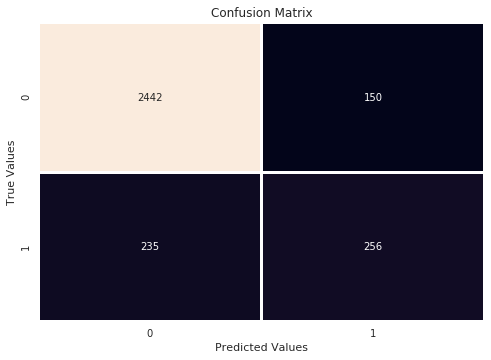

None

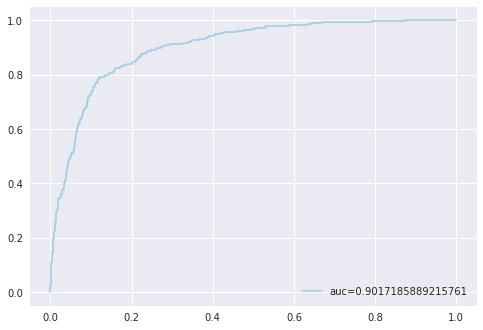

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

lrm_Xdata = df_X.copy() #making our X columns


#getting the values of our x features:

Xlrm = lrm_Xdata.values

#getting the values of our y:
ylrm = df_y.values.ravel() # target



#Splitting data test&train 
X_train, X_test, y_train, y_test= train_test_split(Xlrm, ylrm, test_size=0.25, random_state=123)



#building the Logistic regression model 
lrm = LogisticRegression( max_iter = 2000,random_state=123)#,class_weight={0:0.2,1:0.8})#,random_state=123 )#,penalty='l1')
#lrm = LogisticRegressionCV( )
#fit the model
lrm.fit(X_train, y_train)
#predict the model
y_pred=lrm.predict(X_test)
y_pred_train=lrm.predict(X_train)

print('Classification Report for Classfier Test:')
print(classification_report(y_test, y_pred , zero_division = 0))




confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
#print ('confusion_matrix:' )
#print( confusion_matrix)
print("Accuracy:%.4f" % metrics.accuracy_score(y_test, y_pred))
print ("F1 (weighted): %.4f" % f1_score(y_test, y_pred , average='weighted', zero_division = 0))
print("Precision (weighted): %.4f" % metrics.precision_score(y_test, y_pred , average='weighted', zero_division = 0 ))
print("Recall (weighted): %.4f" % metrics.recall_score(y_test, y_pred,  average='weighted'))

roc_auc = roc_auc_score(y_test, y_pred)
print('AUC' ,roc_auc)
# roc taking from scikit learn website
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#multiclass-settings
y_prob = lrm.predict_proba(X_test)

from sklearn.model_selection import cross_val_score, RepeatedKFold

rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
f1_scores_cv = cross_val_score(lrm,X_train, y_train, scoring='f1', cv=rkf)
roc_auc_cv = cross_val_score(lrm,X_train, y_train, scoring='roc_auc', cv=rkf)

print("model bias (f1-score):", f1_scores_cv.mean())
print("model variance (f1-score):", f1_scores_cv.std())
print("model bias (ROC/AUC):", roc_auc_cv.mean())
print("model variance (ROC/AUC):", roc_auc_cv.std())


sns.heatmap(confusion_matrix,annot=True,
            lw =2,
            cbar=False,
            fmt="d"
           )
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("Confusion Matrix")
display(plt.show())



y_pred_proba = lrm.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()





**For class one we have .32 F1 score which is not ideal.**<br>

### SMOTE for Logistic Regression
We then tried oversampling using **SMOTE** from the **imblearn** package to see if the model will perform better with regards to class one.

Classification Report for Classfier Test:
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      2592
           1       0.52      0.79      0.63       491

    accuracy                           0.85      3083
   macro avg       0.74      0.82      0.77      3083
weighted avg       0.89      0.85      0.86      3083

Accuracy:0.8501
F1 (weighted): 0.8616
Precision (weighted): 0.8858
Recall (weighted): 0.8501
AUC 0.8242096156747379
model bias (f1-score): 0.8623601757368003
model variance (f1-score): 0.010192036765660316
model bias (ROC/AUC): 0.9283555524418164
model variance (ROC/AUC): 0.0058714712187132555


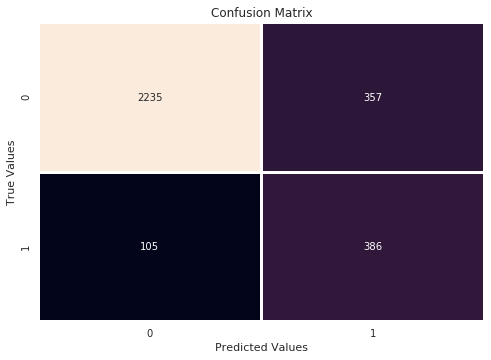

None

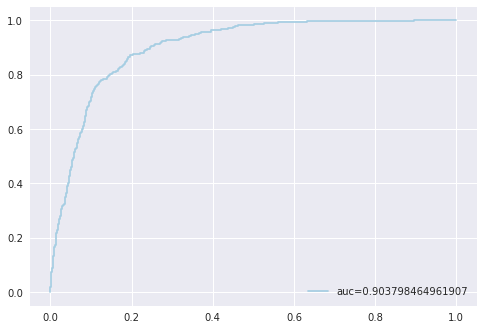

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

lrm_Xdata = df_X.copy() #making our X columns


#getting the values of our x features:
Xlrm = lrm_Xdata.values

#getting the values of our y:
ylrm = df_y.values.ravel() # target



#Splitting data test&train 
X_train, X_test, y_train, y_test= train_test_split(Xlrm, ylrm, test_size=0.25, random_state=123)

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

sm =SMOTE()
X_train_bal, y_train_bal = sm.fit_sample(X_train, y_train)

#building the Logistic regression model 
lrm2 = LogisticRegression( max_iter = 2000,random_state=123)#,class_weight={0:0.2,1:0.8})#,random_state=123 )#,penalty='l1')
#lrm = LogisticRegressionCV( )
#fit the model
lrm2.fit(X_train_bal, y_train_bal)
#predict the model
y_pred=lrm2.predict(X_test)
y_pred_train=lrm2.predict(X_train_bal)

print('Classification Report for Classfier Test:')
print(classification_report(y_test, y_pred , zero_division = 0))




confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
#print ('confusion_matrix:' )
#print( confusion_matrix)
print("Accuracy:%.4f" % metrics.accuracy_score(y_test, y_pred))
print ("F1 (weighted): %.4f" % f1_score(y_test, y_pred , average='weighted', zero_division = 0))
print("Precision (weighted): %.4f" % metrics.precision_score(y_test, y_pred , average='weighted', zero_division = 0 ))
print("Recall (weighted): %.4f" % metrics.recall_score(y_test, y_pred,  average='weighted'))

roc_auc = roc_auc_score(y_test, y_pred)
print('AUC' ,roc_auc)
# roc taking from scikit learn website
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#multiclass-settings
y_prob = lrm2.predict_proba(X_test)

from sklearn.model_selection import cross_val_score, RepeatedKFold

rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
f1_scores_cv = cross_val_score(lrm2,X_train_bal, y_train_bal, scoring='f1', cv=rkf)
roc_auc_cv = cross_val_score(lrm2,X_train_bal, y_train_bal, scoring='roc_auc', cv=rkf)

print("model bias (f1-score):", f1_scores_cv.mean())
print("model variance (f1-score):", f1_scores_cv.std())
print("model bias (ROC/AUC):", roc_auc_cv.mean())
print("model variance (ROC/AUC):", roc_auc_cv.std())


sns.heatmap(confusion_matrix,annot=True,
            lw =2,
            cbar=False,
            fmt="d"
           )
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("Confusion Matrix")
display(plt.show())



y_pred_proba = lrm2.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()



**looking at the Confusion Matrix, The model  with oversampling performed well in predcting class 1  when using all the features. <br> let's try feature selection on top of oversampling <br>
Using the SpFtSel package which picked these features :** <br>

```python

best_features_spsa = ['ProductRelated_skew_s', 'TrafficType_dummies_20',
       'OperatingSystems_dummies_8', 'TrafficType_dummies_5',
       'Browser_dummies_12', 'OperatingSystems_dummies_7']

```


Classification Report for Classfier Test:
              precision    recall  f1-score   support

           0       0.96      0.88      0.91      2592
           1       0.55      0.79      0.65       491

    accuracy                           0.86      3083
   macro avg       0.75      0.83      0.78      3083
weighted avg       0.89      0.86      0.87      3083

Accuracy:0.8628
F1 (weighted): 0.8722
Precision (weighted): 0.8916
Recall (weighted): 0.8628
AUC 0.8333836212315506
model bias (f1-score): 0.844060827973156
model variance (f1-score): 0.008697043128120812
model bias (ROC/AUC): 0.8736544425044486
model variance (ROC/AUC): 0.007007597085782878


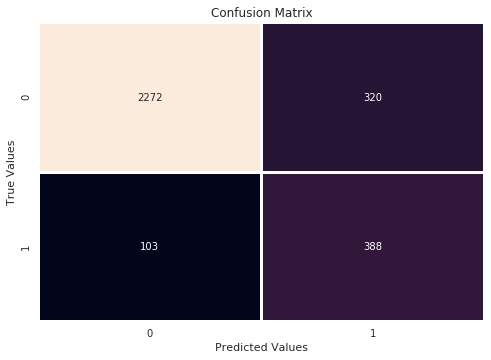

None

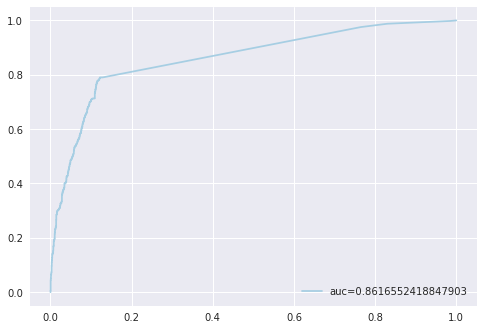

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
#best_features_spsa = ['ProductRelated_skew_s', 'TrafficType_dummies_20',
#       'OperatingSystems_dummies_8', 'TrafficType_dummies_5',
#       'Browser_dummies_12', 'OperatingSystems_dummies_7']
lrm_Xdata = df_X.copy() #making our X columns


#getting the values of our x features:
Xlrm = lrm_Xdata[best_features_spsa].values
#Xlrm= lrm_Xdata[clos_1].values
#Xlrm = lrm_Xdata.values

#getting the values of our y:
ylrm = df_y.values.ravel() # target



#Splitting data test&train 
X_train, X_test, y_train, y_test= train_test_split(Xlrm, ylrm, test_size=0.25, random_state=123)

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
#sm =ADASYN(n_neighbors=20)
sm =SMOTE(k_neighbors=20)
X_train_bal, y_train_bal = sm.fit_sample(X_train, y_train)

#building the Logistic regression model 
lrm3 = LogisticRegression( max_iter = 2000,random_state=123 , C=1.0, dual=False)#,class_weight={0:0.2,1:0.8})#,random_state=123 )#,penalty='l1')
#lrm = LogisticRegressionCV( )
#fit the model
lrm3.fit(X_train_bal, y_train_bal)
#predict the model
y_pred=lrm3.predict(X_test)
y_pred_train=lrm3.predict(X_train_bal)

print('Classification Report for Classfier Test:')
print(classification_report(y_test, y_pred , zero_division = 0))




confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
#print ('confusion_matrix:' )
#print( confusion_matrix)
print("Accuracy:%.4f" % metrics.accuracy_score(y_test, y_pred))
print ("F1 (weighted): %.4f" % f1_score(y_test, y_pred , average='weighted', zero_division = 0))
print("Precision (weighted): %.4f" % metrics.precision_score(y_test, y_pred , average='weighted', zero_division = 0 ))
print("Recall (weighted): %.4f" % metrics.recall_score(y_test, y_pred,  average='weighted'))

roc_auc = roc_auc_score(y_test, y_pred)
print('AUC' ,roc_auc)
# roc taking from scikit learn website
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#multiclass-settings
y_prob = lrm3.predict_proba(X_test)

from sklearn.model_selection import cross_val_score, RepeatedKFold

rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
f1_scores_cv = cross_val_score(lrm3,X_train_bal, y_train_bal, scoring='f1', cv=rkf)
roc_auc_cv = cross_val_score(lrm3,X_train_bal, y_train_bal, scoring='roc_auc', cv=rkf)

print("model bias (f1-score):", f1_scores_cv.mean())
print("model variance (f1-score):", f1_scores_cv.std())
print("model bias (ROC/AUC):", roc_auc_cv.mean())
print("model variance (ROC/AUC):", roc_auc_cv.std())



sns.heatmap(confusion_matrix,annot=True,
            lw =2,
            cbar=False,
            fmt="d"
           )
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("Confusion Matrix")
display(plt.show())



y_pred_proba = lrm3.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()



**Using feature selection helped the model perfume better for class 1 but not by much and performed wrose for class 0.**
# 2- Naive Bayes model :
- Simple 
-  With oversampling
-  With oversampling and feature selection

AUC 0.7322326569611024
Accuracy: 0.8537139150178398
Classification Report for Classfier Test:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      2592
           1       0.54      0.55      0.55       491

    accuracy                           0.85      3083
   macro avg       0.73      0.73      0.73      3083
weighted avg       0.86      0.85      0.85      3083

model bias (f1-score): 0.5764820019292225
model variance (f1-score): 0.033292101177834044
model bias (ROC/AUC): 0.8954902276525618
model variance (ROC/AUC): 0.009466019313726093


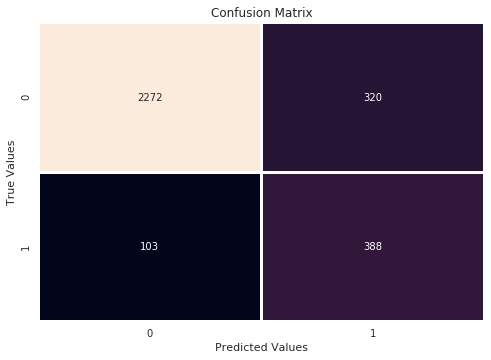

None

In [47]:
#Import Gaussian Naive Bayes model
#from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
#Create a Gaussian Classifier

gnb_Xdata = df_X.copy() #making our X columns


#getting the values of our x features:
#Xlrm = lrm_Xdata[best_features_spsa].values
#X_gnb= gnb_Xdata[clos_1].values
X_gnb = gnb_Xdata.values

#getting the values of our y:
y_gnb = df_y.values.ravel() # target



#Splitting data test&train 
X_train, X_test, y_train, y_test= train_test_split(X_gnb, y_gnb , test_size=0.25, random_state=123)




gnb = BernoulliNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)
from sklearn import metrics
roc_auc = roc_auc_score(y_test, y_pred)
print('AUC' ,roc_auc)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Classification Report for Classfier Test:')
print(classification_report(y_test, y_pred , zero_division = 0))


y_prob = gnb.predict_proba(X_test)


from sklearn.model_selection import cross_val_score, RepeatedKFold

rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
f1_scores_cv = cross_val_score(gnb,X_train, y_train, scoring='f1', cv=rkf)
roc_auc_cv = cross_val_score(gnb,X_train, y_train, scoring='roc_auc', cv=rkf)

print("model bias (f1-score):", f1_scores_cv.mean())
print("model variance (f1-score):", f1_scores_cv.std())
print("model bias (ROC/AUC):", roc_auc_cv.mean())
print("model variance (ROC/AUC):", roc_auc_cv.std())

sns.heatmap(confusion_matrix,annot=True,
            lw =2,
            cbar=False,
            fmt="d"
           )
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("Confusion Matrix")
display(plt.show())

###  Model#2-b: With oversampling

AUC 0.7978764363480929
Accuracy: 0.818358741485566
Classification Report for Classfier Test:
              precision    recall  f1-score   support

           0       0.95      0.83      0.88      2592
           1       0.46      0.77      0.57       491

    accuracy                           0.82      3083
   macro avg       0.70      0.80      0.73      3083
weighted avg       0.87      0.82      0.84      3083

model bias (f1-score): 0.8758124177120972
model variance (f1-score): 0.008869426167303119
model bias (ROC/AUC): 0.9326041590469752
model variance (ROC/AUC): 0.00481195592221095


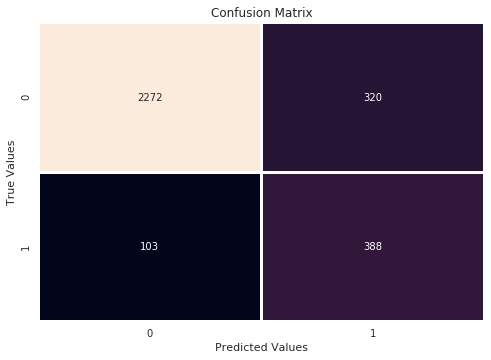

None

In [48]:
#Import Gaussian Naive Bayes model
#from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
#Create a Gaussian Classifier

gnb_Xdata = df_X.copy() #making our X columns


#getting the values of our x features:
#Xlrm = lrm_Xdata[best_features_spsa].values
#X_gnb= gnb_Xdata[clos_1].values
X_gnb = gnb_Xdata.values

#getting the values of our y:
y_gnb = df_y.values.ravel() # target



#Splitting data test&train 
X_train, X_test, y_train, y_test= train_test_split(X_gnb, y_gnb , test_size=0.25, random_state=123)


from imblearn.over_sampling import SMOTE

sm =SMOTE(k_neighbors=20)
X_train_bal, y_train_bal = sm.fit_sample(X_train, y_train)

gnb2 = BernoulliNB()

#Train the model using the training sets
gnb2.fit(X_train_bal, y_train_bal)

#Predict the response for test dataset
y_pred = gnb2.predict(X_test)
from sklearn import metrics
roc_auc = roc_auc_score(y_test, y_pred)
print('AUC' ,roc_auc)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Classification Report for Classfier Test:')
print(classification_report(y_test, y_pred , zero_division = 0))


y_prob = gnb2.predict_proba(X_test)

from sklearn.model_selection import cross_val_score, RepeatedKFold

rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
f1_scores_cv = cross_val_score(gnb2,X_train_bal, y_train_bal, scoring='f1', cv=rkf)
roc_auc_cv = cross_val_score(gnb2,X_train_bal, y_train_bal, scoring='roc_auc', cv=rkf)

print("model bias (f1-score):", f1_scores_cv.mean())
print("model variance (f1-score):", f1_scores_cv.std())
print("model bias (ROC/AUC):", roc_auc_cv.mean())
print("model variance (ROC/AUC):", roc_auc_cv.std())


sns.heatmap(confusion_matrix,annot=True,
            lw =2,
            cbar=False,
            fmt="d"
           )
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("Confusion Matrix")
display(plt.show())

### mdoel #2-c: With oversampling and feature selection

AUC 0.8333836212315506
Accuracy: 0.8627959779435614
Classification Report for Classfier Test:
              precision    recall  f1-score   support

           0       0.96      0.88      0.91      2592
           1       0.55      0.79      0.65       491

    accuracy                           0.86      3083
   macro avg       0.75      0.83      0.78      3083
weighted avg       0.89      0.86      0.87      3083

model bias (f1-score): 0.8509909855505208
model variance (f1-score): 0.010076174681064124
model bias (ROC/AUC): 0.8659660246762998
model variance (ROC/AUC): 0.007974969372474912


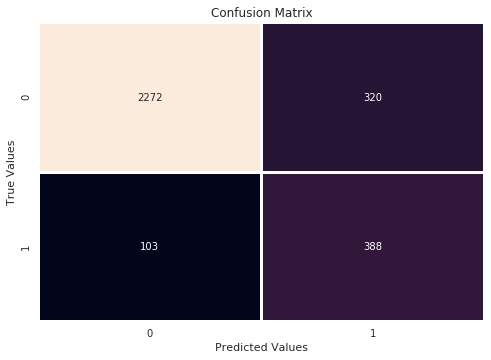

In [49]:
#Import Gaussian Naive Bayes model
#from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
#Create a Gaussian Classifier

gnb_Xdata = df_X.copy() #making our X columns


#getting the values of our x features:
X_gnb = gnb_Xdata[best_features_spsa].values
#X_gnb= gnb_Xdata[clos_1].values
#X_gnb = gnb_Xdata.values

#getting the values of our y:
y_gnb = df_y.values.ravel() # target



#Splitting data test&train 
X_train, X_test, y_train, y_test= train_test_split(X_gnb, y_gnb , test_size=0.25, random_state=123)

from imblearn.over_sampling import SMOTE

sm =SMOTE(k_neighbors=20)
X_train_bal, y_train_bal = sm.fit_sample(X_train, y_train)

gnb3 = BernoulliNB()

#Train the model using the training sets
gnb3.fit(X_train_bal, y_train_bal)

#Predict the response for test dataset
y_pred = gnb3.predict(X_test)
from sklearn import metrics
roc_auc = roc_auc_score(y_test, y_pred)
print('AUC' ,roc_auc)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Classification Report for Classfier Test:')
print(classification_report(y_test, y_pred , zero_division = 0))


y_prob = gnb3.predict_proba(X_test)

from sklearn.model_selection import cross_val_score, RepeatedKFold

rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
f1_scores_cv = cross_val_score(gnb3,X_train_bal, y_train_bal, scoring='f1', cv=rkf)
roc_auc_cv = cross_val_score(gnb3,X_train_bal, y_train_bal, scoring='roc_auc', cv=rkf)

print("model bias (f1-score):", f1_scores_cv.mean())
print("model variance (f1-score):", f1_scores_cv.std())
print("model bias (ROC/AUC):", roc_auc_cv.mean())
print("model variance (ROC/AUC):", roc_auc_cv.std())




sns.heatmap(confusion_matrix,annot=True,
            lw =2,
            cbar=False,
            fmt="d"
           )
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("Confusion Matrix")
plt.show()

__There's no change between the models when applying feature selection__

# 3- DecisionTreeClassifier :
- Simple
- With oversampling 
- With oversampling and feature selection


In [50]:
#With oversampling

from sklearn.tree import DecisionTreeClassifier

dt_Xdata = df_X.copy() #making our X columns


#getting the values of our x features:
#Xdt = dt_Xdata[best_features_spsa].values
#Xdt= dt_Xdata[cols_2].values
Xdt = dt_Xdata.values

#getting the values of our y:
y_dt = df_y.values.ravel() # target



#Splitting data test&train 
X_train, X_test, y_train, y_test= train_test_split(Xdt, y_dt , test_size=0.25, random_state=123)



dt = DecisionTreeClassifier(max_depth=3 )

dt.fit(X_train, y_train)

dt_train_pred2 = dt.predict(X_train)

dt_test_pred2 = dt.predict(X_test)

from sklearn.metrics import accuracy_score,precision_score,recall_score

print("Training Metrics")
print("Accuracy:",accuracy_score(y_train,dt_train_pred2  ))
print("Precision:",precision_score(y_train,dt_train_pred2, zero_division = 0))
print("Recall:",recall_score(y_train,dt_train_pred2, zero_division = 0))


print("Test Metrics")
print("Accuracy:",accuracy_score(y_test,dt_test_pred2))
print("Precision:",precision_score(y_test,dt_test_pred2 , zero_division = 0))
print("Recall:",recall_score(y_test,dt_test_pred2, zero_division = 0))


from sklearn.metrics import classification_report
print('Test Classification Report')
print(classification_report(y_test,dt_test_pred2, zero_division = 0))

from sklearn.metrics import roc_curve, auc
roc_auc = roc_auc_score(y_test, dt_test_pred2)
print('AUC' ,roc_auc)




rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
f1_scores_cv = cross_val_score(dt,X_train, y_train, scoring='f1', cv=rkf)
roc_auc_cv = cross_val_score(dt,X_train, y_train, scoring='roc_auc', cv=rkf)

print("model bias (f1-score):", f1_scores_cv.mean())
print("model variance (f1-score):", f1_scores_cv.std())
print("model bias (ROC/AUC):", roc_auc_cv.mean())
print("model variance (ROC/AUC):", roc_auc_cv.std())







Training Metrics
Accuracy: 0.8981291229587974
Precision: 0.6652748782185108
Recall: 0.6746647847565279
Test Metrics
Accuracy: 0.8790139474537788
Precision: 0.6170634920634921
Recall: 0.6334012219959266
Test Classification Report
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2592
           1       0.62      0.63      0.63       491

    accuracy                           0.88      3083
   macro avg       0.77      0.78      0.78      3083
weighted avg       0.88      0.88      0.88      3083

AUC 0.7794706727263584
model bias (f1-score): 0.6398542583377341
model variance (f1-score): 0.04239684449259821
model bias (ROC/AUC): 0.9149815043285804
model variance (ROC/AUC): 0.007920844522886501


In [51]:
#With oversampling

from sklearn.tree import DecisionTreeClassifier

dt_Xdata = df_X.copy() #making our X columns


#getting the values of our x features:
#Xdt = dt_Xdata[best_features_spsa].values
#Xdt= dt_Xdata[cols_2].values
Xdt = dt_Xdata.values

#getting the values of our y:
y_dt = df_y.values.ravel() # target



#Splitting data test&train 
X_train, X_test, y_train, y_test= train_test_split(Xdt, y_dt , test_size=0.25, random_state=123)

from imblearn.over_sampling import SMOTE

sm =SMOTE(k_neighbors=20)
X_train_bal, y_train_bal = sm.fit_sample(X_train, y_train)

dt2 = DecisionTreeClassifier(max_depth=3 )

dt2.fit(X_train_bal, y_train_bal)

dt_train_pred2 = dt2.predict(X_train_bal)

dt_test_pred2 = dt2.predict(X_test)

from sklearn.metrics import accuracy_score,precision_score,recall_score

print("Training Metrics")
print("Accuracy:",accuracy_score(y_train_bal,dt_train_pred2 , ))
print("Precision:",precision_score(y_train_bal,dt_train_pred2, zero_division = 0))
print("Recall:",recall_score(y_train_bal,dt_train_pred2, zero_division = 0))


print("Test Metrics")
print("Accuracy:",accuracy_score(y_test,dt_test_pred2))
print("Precision:",precision_score(y_test,dt_test_pred2 , zero_division = 0))
print("Recall:",recall_score(y_test,dt_test_pred2, zero_division = 0))

roc_auc = roc_auc_score(y_test, dt_test_pred2)
print('AUC' ,roc_auc)
from sklearn.metrics import classification_report
print('Test Classification Report')
print(classification_report(y_test,dt_test_pred2, zero_division = 0))

from sklearn.metrics import roc_curve, auc






rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
f1_scores_cv = cross_val_score(dt2,X_train_bal, y_train_bal, scoring='f1', cv=rkf)
roc_auc_cv = cross_val_score(dt2,X_train_bal, y_train_bal, scoring='roc_auc', cv=rkf)

print("model bias (f1-score):", f1_scores_cv.mean())
print("model variance (f1-score):", f1_scores_cv.std())
print("model bias (ROC/AUC):", roc_auc_cv.mean())
print("model variance (ROC/AUC):", roc_auc_cv.std())






Training Metrics
Accuracy: 0.886845466155811
Precision: 0.8960512552301255
Recall: 0.8752234993614304
Test Metrics
Accuracy: 0.8663639312358092
Precision: 0.5583456425406204
Recall: 0.769857433808554
AUC 0.8272512477684745
Test Classification Report
              precision    recall  f1-score   support

           0       0.95      0.88      0.92      2592
           1       0.56      0.77      0.65       491

    accuracy                           0.87      3083
   macro avg       0.76      0.83      0.78      3083
weighted avg       0.89      0.87      0.87      3083

model bias (f1-score): 0.8838442644500557
model variance (f1-score): 0.007088764541587782
model bias (ROC/AUC): 0.9394494771219587
model variance (ROC/AUC): 0.00540336315692624


In [52]:
#With oversampling and feature selection

from sklearn.tree import DecisionTreeClassifier

dt_Xdata = df_X.copy() #making our X columns

best_features_dt = [  
     'average_BounceRates/ExitRates_skew_s', 'PageValues_skew_outliner_fix_s' ,'VisitorType_dummies_New_Visitor',
 'Weekend_binary']
#getting the values of our x features:
Xdt = dt_Xdata[best_features_spsa].values
Xdt= dt_Xdata[best_features_dt].values
#Xdt = dt_Xdata.values

#getting the values of our y:
y_dt = df_y.values.ravel() # target



#Splitting data test&train 
X_train, X_test, y_train, y_test= train_test_split(Xdt, y_dt , test_size=0.25, random_state=123)

from imblearn.over_sampling import SMOTE

sm =SMOTE()
X_train_bal, y_train_bal = sm.fit_sample(X_train, y_train)


dtc = DecisionTreeClassifier(max_depth=3,min_samples_split=40)

dtc.fit(X_train_bal,y_train_bal)

dt_train_pred3 = dtc.predict(X_train_bal)

dt_test_pred3 = dtc.predict(X_test)

from sklearn.metrics import accuracy_score,precision_score,recall_score

print("Training Metrics")
print("Accuracy:",accuracy_score(y_train_bal,dt_train_pred3))
print("Precision:",precision_score(y_train_bal,dt_train_pred3))
print("Recall:",recall_score(y_train_bal,dt_train_pred3))


print("Test Metrics")
print("Accuracy:",accuracy_score(y_test,dt_test_pred3))
print("Precision:",precision_score(y_test,dt_test_pred3))
print("Recall:",recall_score(y_test,dt_test_pred3))


from sklearn.metrics import classification_report
print('Test Classification Report')
print(classification_report(y_test,dt_test_pred3))
#print('Test Classification Report')
#print(classification_report(y_train_bal,dt_train_pred3))
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, dt_test_pred3)
roc_auc = auc(false_positive_rate, true_positive_rate)

print('Roc -Auc Curve',roc_auc)

y_prob = dtc.predict_proba(X_test)



rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
f1_scores_cv = cross_val_score(dtc,X_train_bal, y_train_bal, scoring='f1', cv=rkf)
roc_auc_cv = cross_val_score(dtc,X_train_bal, y_train_bal, scoring='roc_auc', cv=rkf)


print("model bias (f1-score):", f1_scores_cv.mean())
print("model variance (f1-score):", f1_scores_cv.std())
print("model bias (ROC/AUC):", roc_auc_cv.mean())
print("model variance (ROC/AUC):", roc_auc_cv.std())

Training Metrics
Accuracy: 0.8471264367816091
Precision: 0.8785515320334262
Recall: 0.8056194125159643
Test Metrics
Accuracy: 0.8627959779435614
Precision: 0.5480225988700564
Recall: 0.790224032586558
Test Classification Report
              precision    recall  f1-score   support

           0       0.96      0.88      0.91      2592
           1       0.55      0.79      0.65       491

    accuracy                           0.86      3083
   macro avg       0.75      0.83      0.78      3083
weighted avg       0.89      0.86      0.87      3083

Roc -Auc Curve 0.8333836212315506
model bias (f1-score): 0.8404294064277497
model variance (f1-score): 0.009153400003094735
model bias (ROC/AUC): 0.8886242598050967
model variance (ROC/AUC): 0.007331209542231399


__changeing the hyperparameters to max_depth=5,min_samples_split=40 and doing feature selection gave us the best model.__

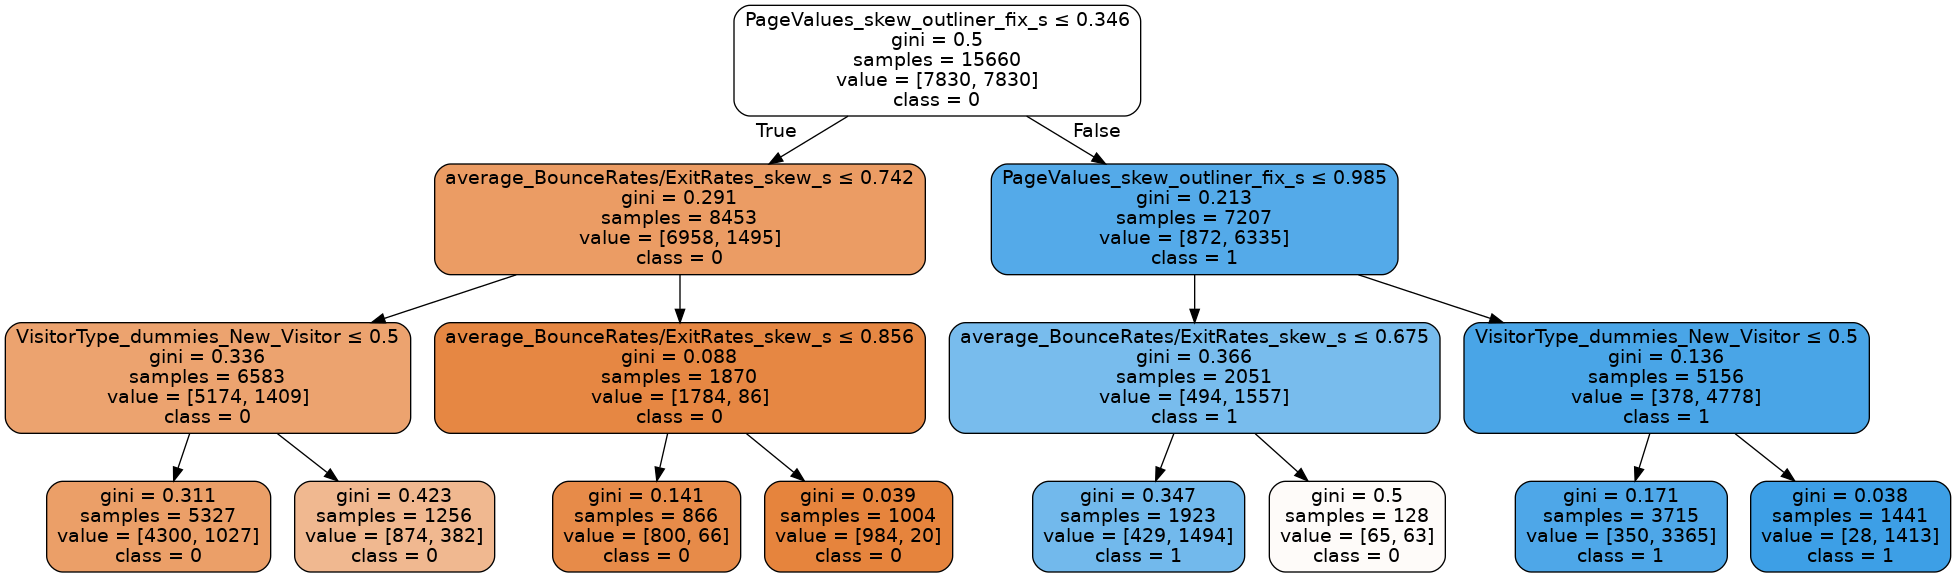

In [161]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names =best_features_dt,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('shopper_tree.png')
Image(graph.create_png())